<a href="https://colab.research.google.com/github/cagBRT/Machine-Learning/blob/master/KNN_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

**Set the number of neighbors to vote**

In [60]:
n_neighbors = 15

**Get and prepare the data**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


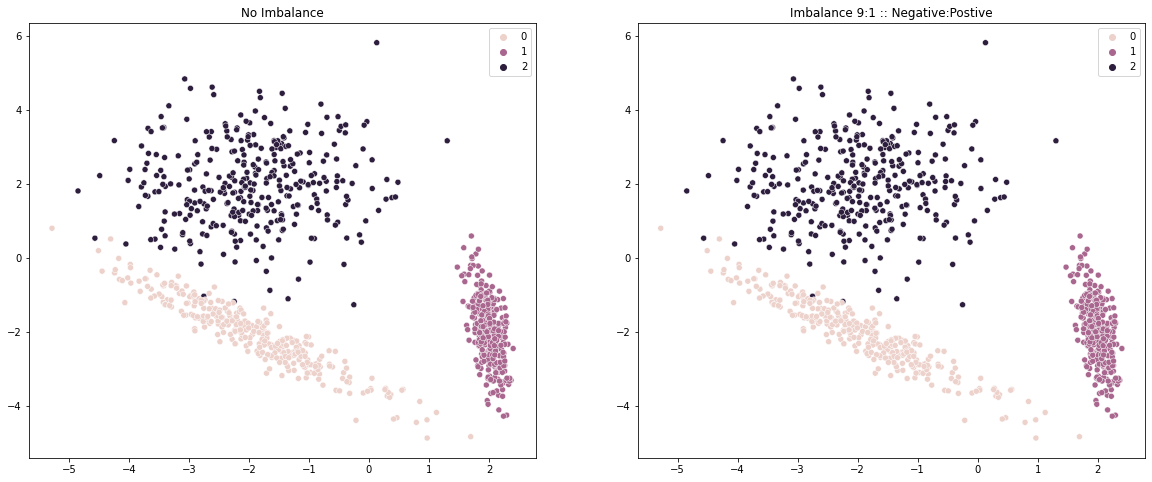

In [61]:
from sklearn.datasets import make_classification
# Generate Balanced Data
Xb,yb = make_classification(n_samples=1000, n_features=2, n_informative=2,n_redundant=0, n_classes=3, n_clusters_per_class=1,class_sep=2,flip_y=0, random_state=17)
f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
sns.scatterplot(Xb[:,0],Xb[:,1],hue=yb,ax=ax1);
ax1.set_title("No Imbalance");
# Generate Imbalanced Data
Xi,yi = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=3, n_clusters_per_class=1,class_sep=2,flip_y=0, random_state=17)
sns.scatterplot(Xi[:,0],Xi[:,1],hue=yi,ax=ax2);
ax2.set_title("Imbalance 9:1 :: Negative:Postive");
plt.show();

In [62]:
X=Xb
y=yb
#X=Xi
#y=yi

**Set the step in the mesh**

In [63]:
h = .02  # step size in the mesh

In [64]:
# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

**Do classification for both uniform and distance weights**<br>
>‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

>‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

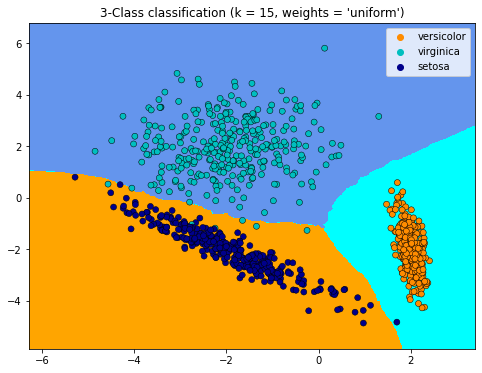

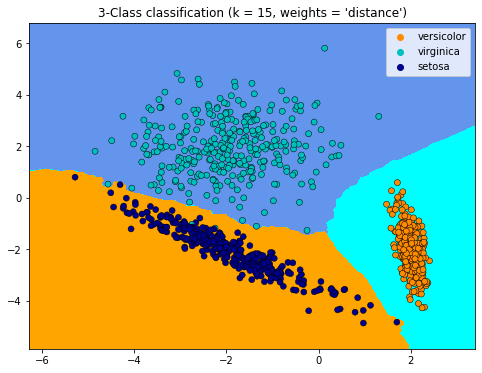

In [65]:
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and train the model.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    #Create a grid data points
    #Then predict to which class each data point belongs
    #This is where the color is coming for the classes
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
plt.show()